In [ ]:
!pip install --upgrade quandl
import statsmodels.api as sm
import quandl
import pandas as pd
import matplotlib.pyplot as plt

Requirement already up-to-date: quandl in /usr/local/lib/python3.6/dist-packages (3.5.3)


In [ ]:
Ths = quandl.get("BCHAIN/HRATE", start_date="2020-06-01")
Ths
#the Total Hash Rate is in 

,Value
Date,
2020-06-01,1.128774e+08
2020-06-02,1.008372e+08
2020-06-03,9.707459e+07
2020-06-04,1.045998e+08
2020-06-05,1.086687e+08
...,...
2020-11-28,1.347102e+08
2020-11-29,1.347102e+08
2020-11-30,1.353998e+08


In [ ]:
Price = quandl.get("BCHAIN/MKPRU", start_date="2020-06-01", end_date="2020-12-02")
Price
#the price is in USD

,Value
Date,
2020-06-01,9698.10
2020-06-02,9450.84
2020-06-03,10204.23
2020-06-04,9525.57
2020-06-05,9658.04
...,...
2020-11-28,17151.44
2020-11-29,17138.87
2020-11-30,17732.42


In [ ]:
df = {'Th/s': [] , 'Price': [] }
i = 0
while i < len(Price['Value']):
  
  df['Th/s'].append(float(Ths['Value'][i]/10000))
  df['Price'].append(float(Price['Value'][i]))
  i += 1


In [ ]:
df1 = pd.DataFrame(df, columns = ['Th/s', 'Price'])
df1



,Th/s,Price
0,11287.743172,9698.10
1,10083.717234,9450.84
2,9707.459128,10204.23
3,10459.975339,9525.57
4,10866.866065,9658.04
...,...,...
180,13471.022569,17151.44
181,13471.022569,17138.87
182,13539.980127,17732.42
183,10761.072792,18191.60


In [ ]:
y = df1["Price"]
X = df1["Th/s"]

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.952
Model:                            OLS   Adj. R-squared (uncentered):              0.952
Method:                 Least Squares   F-statistic:                              3675.
Date:                Wed, 02 Dec 2020   Prob (F-statistic):                   1.53e-123
Time:                        06:45:08   Log-Likelihood:                         -1717.1
No. Observations:                 185   AIC:                                      3436.
Df Residuals:                     184   BIC:                                      3439.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Th/s           0.9182      0.015     60.623      0.000       0.888       0.948
==============================================================================
Omnibus:                       28.817   Durbin-Watson:                   0.241
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.150
Skew:                           1.073   Prob(JB):                     8.57e-09
Kurtosis:                       3.467   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

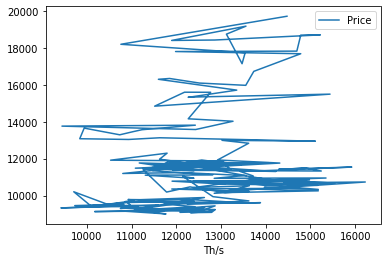

In [ ]:
# plt.figure(1, figsize=(10, 10))

# plt.subplot(211)
# plt.title('Price vs TH/s')
# plt.xlabel('Total hash rate')
# plt.ylabel('Price')
# plt.grid(True)
# plt.plot(y, df_Price['Price'], color='blue')
# plt.plot(X, df_Ths['Total Hash Rate']/10000, color='red')

lines = df1.plot.line(x='Th/s', y='Price')